# Aproksymacja liniowa

Do aproksymacji liniowej służy funkcja [`linalg.lstsq()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq). W pewnym sensie jest trochę dziwna, gdyż trzeba na potrzeby aproksymacji specjalnie przygotować dane. Spowodowane jest to tym, że funkcja ta służy do rozwiązywania bardziej ogólnego zadania: znajdowania współczynników $a_j$ funkcji $f(x)$ o postaci:
$$f(x)=\sum_{j=0}^M a_j\varphi_j(x)$$
gdzie $\varphi_0(x)=1$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

`x` to pomiary wejścia, a `y` pomiary wyjścia obiektu.

In [2]:
x = np.array([0, 1, 2, 3])
y = np.array([0.5, 2.1, 4.2, 7])

Funkcja [`vstack()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vstack.html) służy do komponowania macierzy o wielu wierszach. Pierwszym wierszem będą pomiary wejścia `x`, a drugim stałe wartości 1. `.T` to operacja transpozycji.

In [3]:
A = np.vstack([x, np.ones(len(x))]).T

In [4]:
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

Tak spreparowana macierz `A` stanowi jeden z argumentów funkcji. Funkcja rozwiązuje zadanie optymalizacyjne
$$\overline{y} = \left[\begin{array} {ll} x_1 & 1\\ x_2 & 1\\\ldots&\ldots\\x_n & 1\end{array}\right]\left[\begin{array}{c} m \\ c\end{array}\right]$$
$$Q = (y - \overline{y})(y - \overline{y})^T \rightarrow \text{min!}$$ 

Gdy dodatkowa kolumna złożona jest z samych zer — będziemy interpolować funkcję liniową **bez** wyrazu wolnego.

Gdy macierz $A$ zostanie zbudowana z kolumn $f_1(x)$, $f_2(x),\ldots$, $f_m(x)$ aproksymacja zostanie użyta do wyznaczenia parametrów funkcji (liniowej względem parametrów) $\overline{y} = \sum\alpha_if_i(x)$. Pozwala to na wygodne definiowanie rozwiazywanego problemu.

Funkcja zwrace wiele informacji (w postaci listy). Zerowy jej element to parametry (w kolejności kolumn). Pierwszy to wartość kryterium aproksymacji $Q$. Kolejny to rząd macierzy $A$.

In [5]:
np.linalg.lstsq(A, y, rcond=None)

(array([2.16, 0.21]), array([0.362]), 2, array([4.10003045, 1.09075677]))

In [6]:
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print('m = ',m, ' c = ', c)

m =  2.1599999999999997  c =  0.21000000000000185


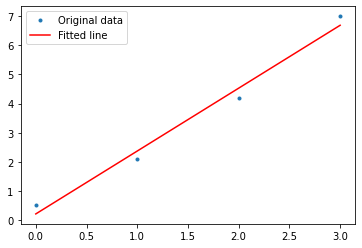

In [7]:
plt.plot(x, y, 'o', label='Original data', markersize=3)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

Zaracam uwagę, że w zależności od tego czy chcemy aby prosta aproksymacyjna przechodziłą przez zero (w przypadku wielu realnych procesów statycznych jest to bezwzględny wymóg: gdy wymuszenie jest równe zero — odpowiedź ukłądu jest również zerowa).

m =  2.250000000000001  c =  0.0


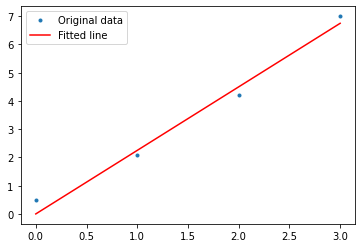

In [8]:
A = np.vstack([x, np.zeros(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print('m = ',m, ' c = ', c)
plt.plot(x, y, 'o', label='Original data', markersize=3)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

Ponieważ mamy cztery punkty, możemy spróbować przeprowadzić wielomian **interpolacyjny** (trzeciego stopnia) przez nie. (Gdy funkcja aproksymująca przechodzi przez wszystkie punkty $y_i$ mamy do czynienia z interpolacją. Wartość kryterium, w tym przypadku, jest równa zeru.)

In [9]:
A = np.vstack([x**3, x**2, x, np.ones(len(x))]).T

In [10]:
A

array([[ 0.,  0.,  0.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 8.,  4.,  2.,  1.],
       [27.,  9.,  3.,  1.]])

In [11]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]

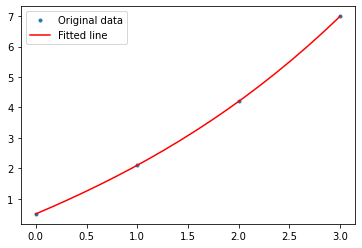

In [12]:
plt.plot(x, y, 'o', label='Original data', markersize=3)
xx = np.linspace(0.,3.,20)
plt.plot(xx, alpha[0] * xx**3 + alpha[1] * xx**2 + alpha[2] * xx + alpha[3], 'r', label='Fitted line')
plt.legend()
plt.show()